In [39]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress openpyxl warning
warnings.simplefilter("ignore")

# Specify the file path
file_path = "testeab.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path, header=2)  # Assuming line 2 is the header

# Remove the last line of the DataFrame
df = df.iloc[:-1]

# Display the resulting DataFrame
display(df)



,CODPROD,PRODUTO,VLRFAT,QTD_VENDAS,VLR_DEVOLUCAO,QTD_DEVOLUCAO,QTD_CLIENTES_ATENDIDOS,VLRDESC,TICKET_MEDIO
0,671,GUARANA MINEIRO PET 2 LTS,4.323396e+08,2228477,8632633.23,65879,68463,577.85,194.006758
1,630,"GUARANA MINEIRO PET 1,5 LTS",5.565266e+07,480490,1201339.80,12583,31895,27.90,115.824801
2,643,GUARANA MINEIRO PET 250ML,5.255655e+07,1054101,1160145.55,26812,56238,1.72,49.859121
3,645,GUARANA MINEIRO PET 600ML,4.526389e+07,773918,1095303.06,20341,46642,2.00,58.486675
4,912,AGUA MINEIRO 500ML COM GAS,3.447694e+07,504275,711829.18,14421,46702,0.00,68.369322
...,...,...,...,...,...,...,...,...,...
96,7914,EMBALAGEM PLASTICA MINEIRO P/24UN 600ML,3.600000e+01,2,NaN,0,2,0.00,18.000000
97,50000,RECEITAS DIVERSAS - ACERTOS,2.950000e+01,4,NaN,0,1,0.00,7.375000
98,1020,AGUA MINEIRO GOIAS 330ML SEM GAS,1.500000e+01,2,NaN,0,2,0.00,7.500000
99,1025,AGUA MINEIRO GOIAS 200ML SEM GAS,1.500000e+01,3,NaN,0,3,0.00,5.000000


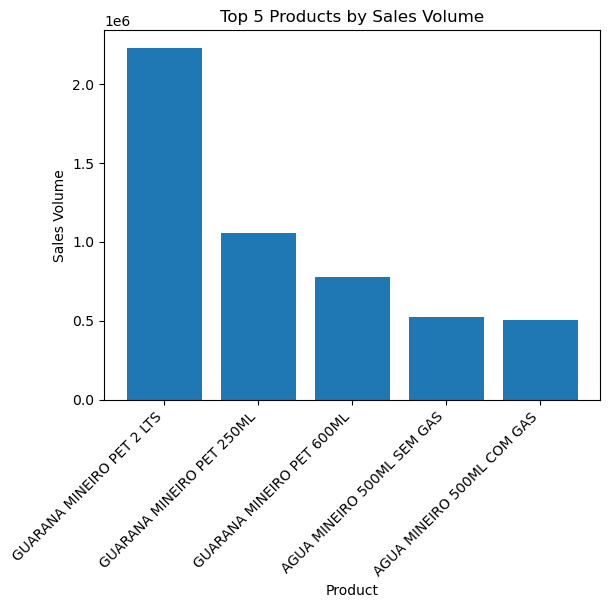

In [40]:
top_products = df.nlargest(5, 'QTD_VENDAS')

plt.bar(top_products['PRODUTO'], top_products['QTD_VENDAS'])
plt.xlabel('Product')
plt.ylabel('Sales Volume')
plt.title('Top 5 Products by Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.show()

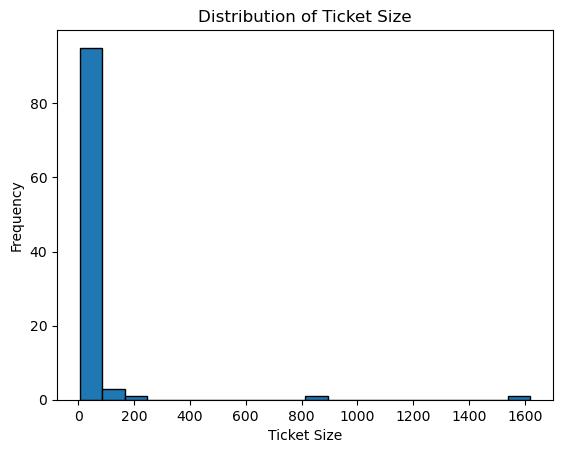

In [41]:
plt.hist(df['TICKET_MEDIO'], bins=20, edgecolor='black')
plt.xlabel('Ticket Size')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Size')
plt.show()

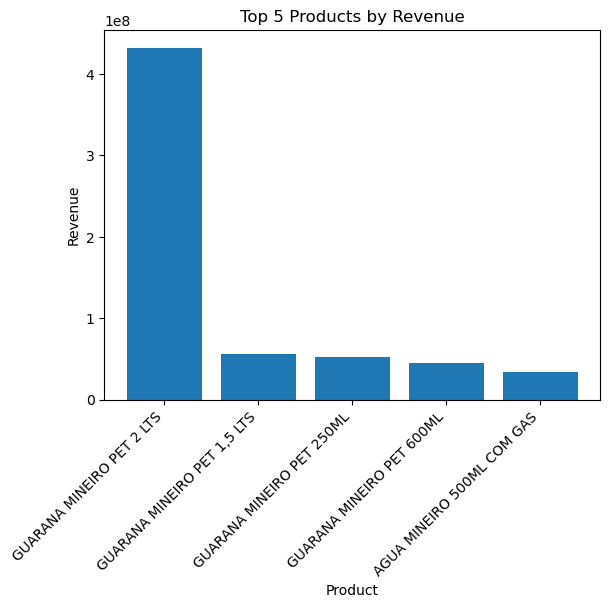

In [42]:
top_revenue_products = df.nlargest(5, 'VLRFAT')

plt.bar(top_revenue_products['PRODUTO'], top_revenue_products['VLRFAT'])
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Top 5 Products by Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
# Drop the 'PRODUTO' column before calculating correlation
df_correlation = df.drop(columns=['PRODUTO'])

# Calculate correlation matrix
correlation_matrix = df_correlation.corr()

# Display the correlation matrix
print(correlation_matrix)

                         CODPROD    VLRFAT  QTD_VENDAS  VLR_DEVOLUCAO  \
CODPROD                 1.000000 -0.024242   -0.047204       0.044138   
VLRFAT                 -0.024242  1.000000    0.904534       0.998573   
QTD_VENDAS             -0.047204  0.904534    1.000000       0.919368   
VLR_DEVOLUCAO           0.044138  0.998573    0.919368       1.000000   
QTD_DEVOLUCAO          -0.044902  0.916776    0.995133       0.932945   
QTD_CLIENTES_ATENDIDOS -0.097612  0.615134    0.855398       0.641737   
VLRDESC                -0.013055  0.105945    0.216947       0.114456   
TICKET_MEDIO            0.104006  0.070976    0.041342       0.680439   

                        QTD_DEVOLUCAO  QTD_CLIENTES_ATENDIDOS   VLRDESC  \
CODPROD                     -0.044902               -0.097612 -0.013055   
VLRFAT                       0.916776                0.615134  0.105945   
QTD_VENDAS                   0.995133                0.855398  0.216947   
VLR_DEVOLUCAO                0.932945     

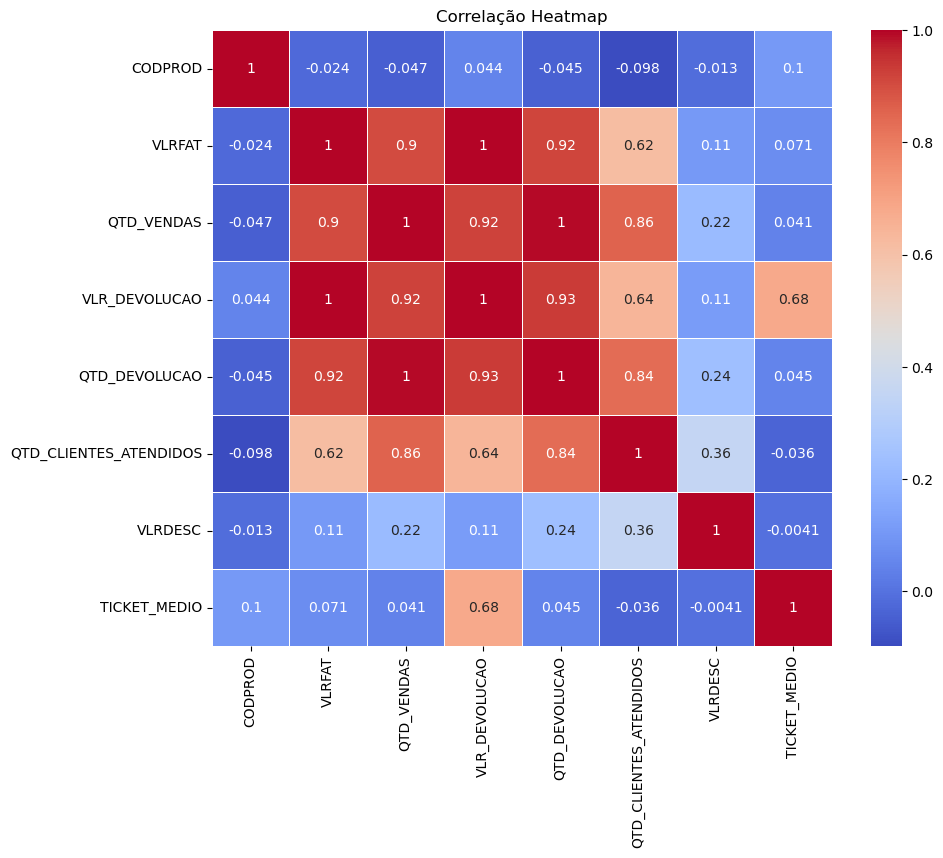

In [44]:
df_correlation = df.drop(columns=['PRODUTO'])
correlation_matrix = df_correlation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlação Heatmap')
plt.show()

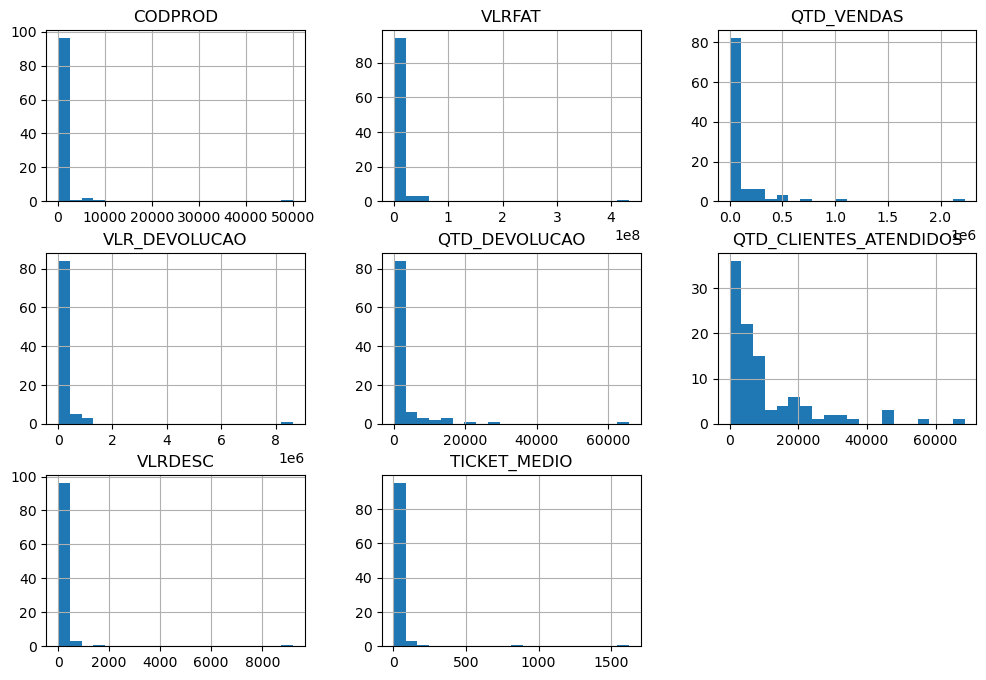

In [46]:
df_hist = df.drop(columns=['PRODUTO'])

# Create histograms for each numerical feature
df_hist.hist(figsize=(12, 8), bins=20)
plt.show()